# Resignings analysis
____

## What this project is about

In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) and the [Technical and Further Education (TAFE)](https://en.wikipedia.org/wiki/Technical_and_further_education) institute in Queensland, Australia. 

We'll try to answer the folowing questuions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Introducing datasets

We'll work with two datasets. The first one is for DETE which you can download from [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). There are some key columns from `dete_survey.csv` down below:
* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE

And the second one is for TAFE - `tafe_survey.csv`. You can find it [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey). And some key columns as well:
* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall`. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Also let's take a look on the first few rows and overall info of both datasets. Start with DETE. 

In [1]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


The `dete_survey` dataframes definitely has columns that won't help us in our analysis. So we'll drop them.

Also date columns have `Not Stated` values that should be `NaN`. We'll fix it as well.

In [3]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The `tafe_survey` dataframe also has some extra columns that we should drop.

Also there are some columns with the same information but diffirent names. We'll should give them identical names.


## Cleansing the data

Let's start with thease `Not Stated` values. We just reread `dete_survey.csv` using `na_values` parameter.

In [5]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

Then drop some columns from both dataframes leaving only **useful** columns.

In [6]:
dete_survey_updated = dete_survey.drop(labels=dete_survey.columns[28:49], axis=1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [7]:
tafe_survey_updated = tafe_survey.drop(labels=tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

Now we can rename columns in our datasets. We'll apply two rules to standardize names:
* All in lowercase.
* Underscores instead of spaces

In [8]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Because of long and complex column names in the `tafe_survey_updated` we'll rename them manually. Also in that way we'll make identical names for columns in both dataframes.

In [9]:
name_map = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
            'Reason for ceasing employment': 'separationtype',
            'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
            'Employment Type. Employment Type': 'employment_status',
            'Classification. Classification': 'position',
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(columns=name_map, inplace=True)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Let's refresh one of the projects main question.
> Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?

So we are intrestred in only **resignation**. All other separation types are useless for us.
Let's see what separation types do we have.

In [10]:
dete_survey_updated['separationtype'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [11]:
tafe_survey_updated['separationtype'].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

For the `dete_survey_updated` we should keep only rows with folowing `separationtype`:
* `Resignation-Other reasons`
* `Resignation-Other employer`
* `Resignation-Move overseas/interstate`

And only `Resignation` for the `tafe_survey_updated`.

In [12]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [13]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


It looks like separation went as planned.


## Verifying the data
Now we can check `cease_date` and `dete_start_date` columns for values that doesn't make any sense. We'll use three criterias:
* Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
* The `cease_date` have to be after `dete_start_date` for obvious reasons.
* Given that most people in this field start working in their 20s, it's unlikely that the `dete_start_date` was before the year 1940.

Since we're checking only year, let's clean date colunms from extra info starting from the `cease_date` in the `dete_resignations`.

In [14]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

Extract four-digit years and convert them into float.

In [15]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r"([0-9]{4})").astype('float')
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

Looking good! Now check the `dete_start_date`.

In [16]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

Everything's fine with `dete_start_date`. Finally check the `cease_date` from the `tafe_resignations`.

In [17]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

It's also fine. At last we compare `cease_date` and `dete_start_date`. We substruct one column from another and assign the result to a new one - `institute_service`. Furhter it'll help us to answer to the project question.

In [18]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations['institute_service'].value_counts().sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

The `cease_date` goes after the `dete_start_date` or they're equal as it should.

Let's also visualize our dates to make sure we were right and see distribution as well.

<IPython.core.display.Javascript object>


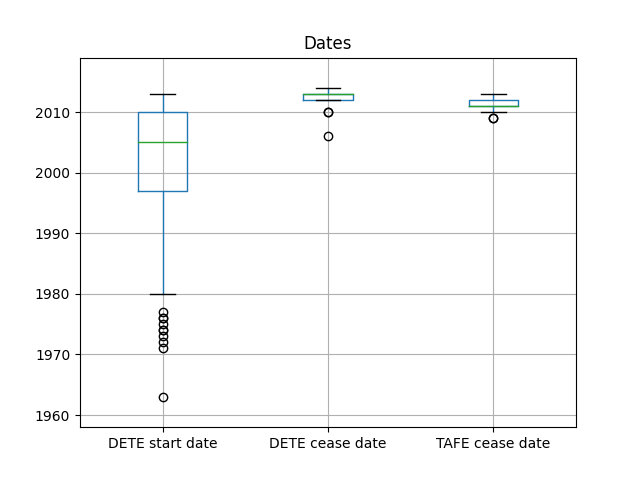

(1958.0, 2019.0)

In [19]:
import matplotlib.pyplot as plt
%matplotlib notebook
dates_for_plot = pd.DataFrame({'DETE start date': dete_resignations['dete_start_date'],
                               'DETE cease date': dete_resignations['cease_date'],
                               'TAFE cease date': tafe_resignations['cease_date']})
                          
fig1, ax1 = plt.subplots()
dates_for_plot.boxplot()
ax1.set_title('Dates')
ax1.set_ylim([dates_for_plot.min().min() - 5, dates_for_plot.max().max() + 5])

## Identifying dissatisfied employees

Next, we'll identify any employees who resigned because they were dissatisfied.

There are columns in both dataframe that are relative to dissatisfaction. We'll use them to categorize employees as "dissatisfied" in genereal. For the `dete_resignations` it will be:
* `job_dissatisfaction`
* `dissatisfaction_with_the_department`
* `physical_work_environment`
* `lack_of_recognition`
* `lack_of_job_security`
* `work_location`
* `employment_conditions`
* `work_life_balance`
* `workload`

And only two for the `tafe_resignations`:
* `Contributing Factors. Dissatisfaction`
* `Contributing Factors. Job Dissatisfaction`

Let's convert any values that mark dissatisfaction to `True` and others to `False`. We'll keep `NaN` as it is. After that we'll add the summarizing column `dissatisfied` with boolean values as well.

The `tafe_resignations` goes first.

In [20]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [21]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Now we can see all the values to write a function for correct transformation them to boolean values.

In [22]:
def update_vals(value):
    if value == '-':
        return False
    elif pd.isnull(value):
        return np.nan
    else: return True

tafe_dissat_cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

tafe_resignations[tafe_dissat_cols] = tafe_resignations[tafe_dissat_cols].applymap(update_vals)

tafe_resignations['dissatisfied'] = tafe_resignations[tafe_dissat_cols].any(axis=1, skipna=False)

tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [23]:
tafe_resignations_up = tafe_resignations.copy()

The `tafe_resignations` is done. Now repeat the whole procedure with the `dete_resignations`.

In [24]:
dete_dissat_col = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment',
                  'lack_of_recognition', 'lack_of_job_security', 'work_location',
                  'employment_conditions', 'work_life_balance', 'workload']

print(dete_resignations['job_dissatisfaction'].value_counts(dropna=False))

dete_resignations[dete_dissat_col]

False    270
True      41
Name: job_dissatisfaction, dtype: int64


,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
808,False,False,False,False,False,False,False,False,False
815,False,False,False,False,False,False,False,False,False
816,False,False,False,False,False,False,False,False,False
819,False,False,False,False,False,False,False,True,False


Looks like all values are boolean already. We just need add the `dissatisfied` column and make copy of dataframe.

In [25]:
dete_resignations['dissatisfied'] = dete_resignations[dete_dissat_col].any(axis=1, skipna=False)

print(dete_resignations['dissatisfied'].value_counts(dropna=False))

dete_resignations_up = dete_resignations.copy()

False    162
True     149
Name: dissatisfied, dtype: int64


## Combining dataframes

We are just about ready to combine dataframes. But we should add column representing institute name at first.

In [26]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We still have some columns left in the `commbined` that we don't need to complete our analysis. Let's drop any columns with less than 500 non null values.

In [27]:
combined_updated = combined.dropna(axis=1, thresh=500).copy()
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


Finally we've got whole dataset in the `combined`. But there is still one problem - `institute_service` column contains values in a couple different forms.

In [28]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


We'll convert these values into categories based on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage). But we'll slightly modify  definitions from the article:
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

Extracting exact years values from the `intitute_service`, convert them to `float` and assign back to the column.

In [29]:
inst_serv_years = combined_updated['institute_service'].astype('str').str.extract(r"([0-9][0-9]?)", expand=False).astype('float')
combined_updated['institute_service'] = inst_serv_years
combined_updated['institute_service'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

Now we can categorize these values into four groups according our classification above. For the result we'll create a new column `service_cat`.

In [30]:
def categorize(value):
    if pd.isnull(value):
        pass
    elif value < 3:
        return 'New'
    elif 3 <= value <= 6:
        return 'Experienced'
    elif 7 <= value <= 10:
        return 'Established'
    elif value > 10:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(categorize)
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

Seems pretty good! Now we can do actual analysis.

## Analysing the data

We should calculate the percentage of dissatisfied employees in each category to answer to project question. But first let's get rid off `NaN` values in the `dissatisfied` column.

In [32]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

There are 8 `NaN` values for now. We'll replace them with the most frequent value in this column which is `False`.

In [34]:
combined_updated['dissatisfied'].fillna(False, inplace=True)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

Now we can calculate the percentages for each category. Also let's plot the result.

In [63]:
pivot_dis = pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat')
pivot_dis

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


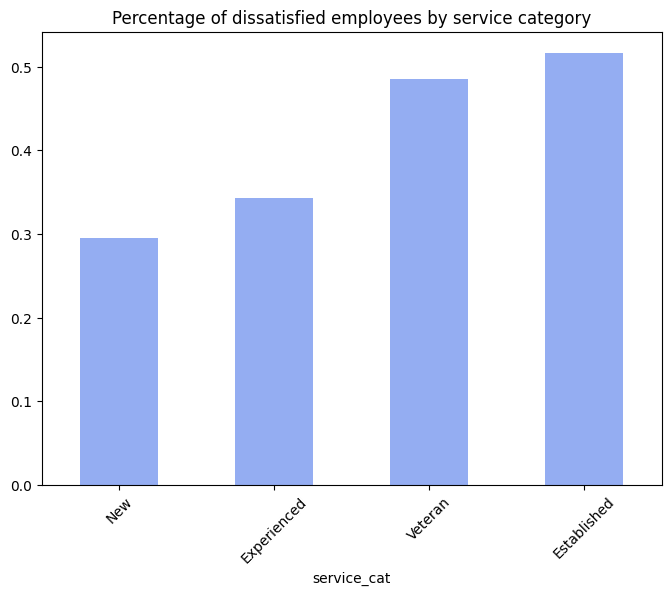

In [66]:
%matplotlib inline
pivot_dis.sort_values(by='dissatisfied').plot(kind='bar', legend=False, rot=45, figsize=(8,6),
                                              color='#94adf2', title='Percentage of dissatisfied employees by service category')

Looks like work experience in the institutes has a negative impact on satisfacticton. Employees from `Veteran` and `Established` categories are significantly more dissatisfied than employees from `New` and `Experienced` categories.